<a href="https://colab.research.google.com/github/elita234/Uber_Rides/blob/main/Uber_Rides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/Studies/Personal Projects/Uber rides')

# import training

In [24]:
import pandas as pd


data  = pd.read_csv('/content/drive/MyDrive/Studies/Personal Projects/Uber rides/data.csv').sample(10000)

In [74]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,test,L2
3634132,3634133,11.7,2010-01-22 22:20:00+00:00,-73.997130,40.725597,-73.99001,40.767258,1,-33.271533,3.769055
12881477,12881478,3.7,2009-07-05 00:33:00+00:00,-73.984490,40.754692,-73.98632,40.759450,5,-33.229798,0.410636
5823194,5823195,8.5,2009-07-11 13:02:20+00:00,-73.947945,40.774742,-73.97558,40.744804,3,-33.173203,2.683631
14345423,14345424,4.5,2010-05-04 18:16:00+00:00,-73.959010,40.774937,-73.94675,40.772438,1,-33.184073,0.900546
14226569,14226570,9.0,2013-05-18 21:59:00+00:00,-73.989426,40.757960,-73.97658,40.785590,2,-33.231466,2.341336


In [26]:
data.describe()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.003281e+07,11.262066,-72.626838,40.023008,-72.573612,39.990704,1.694100
std,5.796304e+06,9.473762,18.695865,13.150241,18.794183,13.198821,1.311449
min,6.072000e+03,-49.570000,-1617.503800,-73.994300,-1617.503800,-73.998360,0.000000
25%,4.964090e+06,6.000000,-73.992480,40.734306,-73.991420,40.733571,1.000000
50%,1.008522e+07,8.500000,-73.981955,40.752443,-73.979935,40.752759,1.000000
75%,1.510217e+07,12.500000,-73.966878,40.766873,-73.963193,40.768341,2.000000
max,1.998946e+07,122.000000,40.770515,1205.336400,40.817596,1205.336400,6.000000


In [27]:
data.dtypes

key                    int64
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [28]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [29]:
holidays = pd.read_csv('/content/drive/MyDrive/Studies/Personal Projects/Uber rides/Holidays.csv', encoding='cp1252')


In [30]:
holidays.head(5)

,day,month,year,Holiday name
0,1,1,2009,New Year
1,1,1,2010,New Year
2,1,1,2011,New Year
3,1,1,2012,New Year
4,1,1,2013,New Year


# Check for empty values

In [31]:
data.isna().sum().sum()

0

In [32]:
data.isnull().sum().sum()

0

# Adding features

In [ ]:
from time import time
import numpy as np
import math

def L1_dist_in_manhattan(lat_1, lng_1, lat_2, lng_2):

  alpha = 29*np.pi/180   # the tilt of manhattan streets
  delta_lat = np.abs(lat_2 - lat_1)*69 # 1 degree of latitude is equal to approximately 69 miles
  delta_long = np.abs(lng_2 - lng_1)*50 # 1 degree of longitude is equal to approximately 50 miles

  D = (delta_lat**2+delta_long**2)**0.5
  beta = np.arctan(delta_long/delta_lat)
  y = np.abs(D*np.sin(beta-alpha))
  x = np.abs(D*np.cos(beta-alpha))

  return x+y

def L2_dist(lat_1, lng_1, lat_2, lng_2):
  delta_lat = np.abs(lat_2 - lat_1)*69 # 1 degree of latitude is equal to approximately 69 miles
  delta_long = np.abs(lng_2 - lng_1)*50 # 1 degree of longitude is equal to approximately 50 miles

  

In [81]:
data['L1_manhattan'] = L1_dist_in_manhattan(data['pickup_latitude'],data['pickup_longitude'],data['dropoff_latitude'],data['dropoff_longitude'])

Calculating the manhattan distance in manhattan:
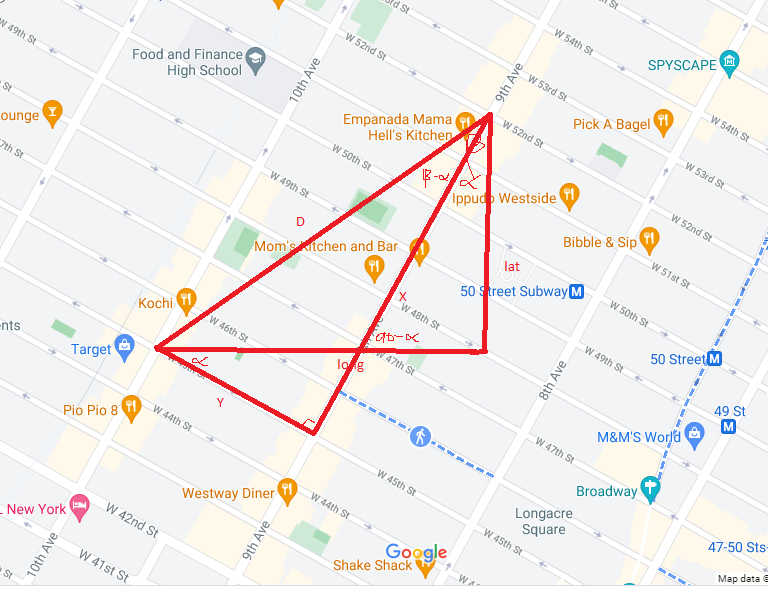


In [ ]:
def get_manhattan_distance_in_manhattan(lat_1, lng_1, lat_2, lng_2): 
    try:
        if lat_1 < 0 and lng_1>0:
            temp = lat_1
            lat_1 = lng_1
            lng_1 = temp
        
        if lat_2 < 0 and lng_2>0:
            temp = lat_2
            lat_2 = lng_2
            lng_2 = temp
        
        alpha = 29*np.pi/180   # the tilt of manhattan streets

        delta_lat = math.fabs(lat_2 - lat_1)*69 # 1 degree of latitude is equal to approximately 69 miles
        delta_long = math.fabs(lng_2 - lng_1)*50 # 1 degree of longitude is equal to approximately 50 miles

        D = (delta_lat**2+delta_long**2)**0.5

        if delta_lat != 0 and  delta_long != 0:
            beta = math.atan(delta_long/delta_lat)
        else:
            beta = 0

        y = math.fabs(D*math.sin(beta-alpha))
        x = math.fabs(D*math.cos(beta-alpha))

        return x+y
    
    except:
        #print(lat_1, lng_1, lat_2, lng_2)
        return 0

def get_distance(lat_1, lng_1, lat_2, lng_2): 

    if lat_1 < 0 and lng_1>0:
            temp = lat_1
            lat_1 = lng_1
            lng_1 = temp
        
    if lat_2 < 0 and lng_2>0:
            temp = lat_2
            lat_2 = lng_2
            lng_2 = temp
    
    delta_lat = math.fabs(lat_2 - lat_1)*69
    delta_long = math.fabs(lng_2 - lng_1)*50

    D = (delta_lat**2+delta_long**2)**0.5
    

    return D

def manh_checker(lat_1, lng_1, lat_2, lng_2):
    
    if lat_1 < 0 and lng_1>0:
            temp = lat_1
            lat_1 = lng_1
            lng_1 = temp
        
    if lat_2 < 0 and lng_2>0:
            temp = lat_2
            lat_2 = lng_2
            lng_2 = temp
    
    
    
    if  40.70154921795894 < lat_2 and lat_2 < 40.8205 and -74.02399894516964 < lng_2 and lng_2 < -73.9307 :
        i=1
    else:
        i=-1
    
    if   40.70154921795894 < lat_1 and lat_1 < 40.8205 and -74.02399894516964 < lng_1 and  lng_1 < -73.9307:
        j=1
    else:
        j=-1
    return i*j

def errored_coordinates(lat_1, lng_1, lat_2, lng_2):
    if lat_1 == 0 or lng_1 ==0 or lat_2 ==0 or lng_2 ==0:
        return 1
    else:
        return 0
    
def around_airports(lat_1, lng_1, lat_2, lng_2):
    
    if lat_1 < 0 and lng_1>0:
            temp = lat_1
            lat_1 = lng_1
            lng_1 = temp
        
    if lat_2 < 0 and lng_2>0:
            temp = lat_2
            lat_2 = lng_2
            lng_2 = temp
    
    ## LaGuardia Airport 40.7673424826843, -73.89267599386628 |  40.783612359620655, -73.85929569227089
    if (40.7673424826843 < lat_1 and lat_1 < 40.783612359620655 and  -73.89267599386628 < lng_1 and lng_1 < -73.85929569227089 ) \
    or \
    (40.7673424826843 < lat_2 and lat_2 < 40.783612359620655 and  -73.89267599386628 < lng_2 and lng_2 < -73.85929569227089 ):
        return 1
    
    ## John F. Kennedy International Airport 40.671733605420286, -73.82384416644206 |  40.614076888863465, -73.74980058899195
    if (40.614076888863465 < lat_1 and lat_1 < 40.671733605420286 and   -73.82384416644206 < lng_1 and lng_1 < -73.74980058899195 ) \
    or \
     (40.614076888863465 < lat_2 and lat_2 < 40.671733605420286 and   -73.82384416644206 < lng_2 and lng_2 < -73.74980058899195 ):
        return 1
    
    ## Newark Liberty International Airport 40.70849750906818, -74.1433447536073 |  40.67425994361148, -74.19905951106566
    if (40.67425994361148 < lat_1 and lat_1 < 40.70849750906818 and   -74.19905951106566 < lng_1 and lng_1 < -74.1433447536073 ) \
    or \
     (40.67425994361148 < lat_2 and lat_2 < 40.70849750906818 and   -74.19905951106566 < lng_2 and lng_2 < -74.1433447536073 ):
        return 1
    
    return 0

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:



def add_cols(sp):
    
    
    
    udf_func1 = udf(lambda lat_1, lng_1, lat_2, lng_2: get_manhattan_distance_in_manhattan(lat_1, lng_1, lat_2, lng_2), returnType=FloatType())
    sp = sp.withColumn('drive_length', (udf_func1(sp.pickup_latitude, sp.pickup_longitude, sp.dropoff_latitude, sp.dropoff_longitude)).cast("float"))
    
    udf_func2 = udf(lambda lat_1, lng_1, lat_2, lng_2: get_distance(lat_1, lng_1, lat_2, lng_2), returnType=FloatType())
    sp = sp.withColumn('distance', (udf_func2(sp.pickup_latitude, sp.pickup_longitude, sp.dropoff_latitude, sp.dropoff_longitude)).cast("float"))
    
    udf_func3 = udf(lambda lat_1, lng_1, lat_2, lng_2: manh_checker(lat_1, lng_1, lat_2, lng_2), returnType=ByteType())
    sp = sp.withColumn('stayed_in_city_or_out', (udf_func3(sp.pickup_latitude, sp.pickup_longitude, sp.dropoff_latitude, sp.dropoff_longitude)).cast("Byte"))
    
    udf_func4 = udf(lambda lat_1, lng_1, lat_2, lng_2: errored_coordinates(lat_1, lng_1, lat_2, lng_2), returnType=ByteType())
    sp = sp.withColumn('error_in_coordinates', (udf_func4(sp.pickup_latitude, sp.pickup_longitude, sp.dropoff_latitude, sp.dropoff_longitude)).cast("Byte"))
    
    udf_func5 = udf(lambda lat_1, lng_1, lat_2, lng_2: around_airports(lat_1, lng_1, lat_2, lng_2), returnType=ByteType())
    sp = sp.withColumn('around_airport', (udf_func5(sp.pickup_latitude, sp.pickup_longitude, sp.dropoff_latitude, sp.dropoff_longitude)).cast("Byte"))
    
    
    
    sp = sp.withColumn("dayoftheweek", (dayofweek(sp.pickup_datetime)).cast("int"))
    sp = sp.withColumn("day", (dayofmonth(sp.pickup_datetime)).cast("int"))
    sp = sp.withColumn("hour", (hour(sp.pickup_datetime)).cast("int"))
    sp = sp.withColumn("minute", (minute(sp.pickup_datetime)).cast("int"))
    sp = sp.withColumn("month", (month(sp.pickup_datetime)).cast("int"))
    sp = sp.withColumn("year", (year(sp.pickup_datetime)).cast("int"))
    
    return sp



small_train = add_cols(small_train)
small_train = small_train.withColumn("high_fare", (small_train.fare_amount>=10).cast("Byte"))

test = add_cols(test)



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
t_0 = time()

small_train.show(5)
#small_train.describe().show()
test.show(5)
#test.describe().show()

print('\n', np.round(time()-t_0, 3), " seconds elapsed adding features")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----------+-------------------+----------------+---------------+-----------------+----------------+---------------+------------+---------+---------------------+--------------------+--------------+------------+---+----+------+-----+----+---------+
|key|fare_amount|    pickup_datetime|pickup_longitude|pickup_latitude|dropoff_longitude|dropoff_latitude|passenger_count|drive_length| distance|stayed_in_city_or_out|error_in_coordinates|around_airport|dayoftheweek|day|hour|minute|month|year|high_fare|
+---+-----------+-------------------+----------------+---------------+-----------------+----------------+---------------+------------+---------+---------------------+--------------------+--------------+------------+---+----+------+-----+----+---------+
|  1|        8.5|2010-01-30 19:27:00|       -73.96539|      40.768574|       -73.998184|       40.761074|              1|   2.4305801|1.7192822|                    1|                   0|             0|           7| 30|  19|    27|    1|2010

# Adding holidays feature

In [ ]:
small_train.registerTempTable("df")
holidays.registerTempTable("holidays")

train = spark.sql("select df.*,Case when h.year is null then 0 else 1 end As is_holiday \
                  from df left join holidays h on df.day = h.day and df.month = h.month and df.year = h.year")

train = train.withColumn("is_holiday",train.is_holiday.cast("Byte"))


test.registerTempTable("test")
test = spark.sql("select test.*,Case when h.year is null then 0 else 1 end As is_holiday \
                  from test left join holidays h on test.day = h.day and test.month = h.month and test.year = h.year")
test = test.withColumn("is_holiday",test.is_holiday.cast("Byte"))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
t_0 = time()
train.show(5)
print('\n', np.round(time()-t_0, 3), " seconds elapsed adding holiday feature")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----------+-------------------+----------------+---------------+-----------------+----------------+---------------+------------+---------+---------------------+--------------------+--------------+------------+---+----+------+-----+----+---------+----------+
|key|fare_amount|    pickup_datetime|pickup_longitude|pickup_latitude|dropoff_longitude|dropoff_latitude|passenger_count|drive_length| distance|stayed_in_city_or_out|error_in_coordinates|around_airport|dayoftheweek|day|hour|minute|month|year|high_fare|is_holiday|
+---+-----------+-------------------+----------------+---------------+-----------------+----------------+---------------+------------+---------+---------------------+--------------------+--------------+------------+---+----+------+-----+----+---------+----------+
|  1|        8.5|2010-01-30 19:27:00|       -73.96539|      40.768574|       -73.998184|       40.761074|              1|   2.4305801|1.7192822|                    1|                   0|             0|      

# Filitering

In [ ]:
t_0 = time()
train = train.dropna()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
#train.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
#train.filter("fare_amount < 0").show() # 
#train.filter("fare_amount < 0").count() # 35

train = train.filter("fare_amount > 0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
#train.filter("drive_length > 170").show(5) #
#train.filter("drive_length > 170").count() # 2458
#test.filter("drive_length > 100").show(22) # 
#test.filter("drive_length > 100").count() # 2458


train = train.filter("drive_length < 100")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
train.show(5)
print('\n', np.round(time()-t_0, 3), " seconds elapsed filtering")



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----------+-------------------+----------------+---------------+-----------------+----------------+---------------+------------+---------+---------------------+--------------------+--------------+------------+---+----+------+-----+----+---------+----------+
|key|fare_amount|    pickup_datetime|pickup_longitude|pickup_latitude|dropoff_longitude|dropoff_latitude|passenger_count|drive_length| distance|stayed_in_city_or_out|error_in_coordinates|around_airport|dayoftheweek|day|hour|minute|month|year|high_fare|is_holiday|
+---+-----------+-------------------+----------------+---------------+-----------------+----------------+---------------+------------+---------+---------------------+--------------------+--------------+------------+---+----+------+-----+----+---------+----------+
|  1|        8.5|2010-01-30 19:27:00|       -73.96539|      40.768574|       -73.998184|       40.761074|              1|   2.4305801|1.7192822|                    1|                   0|             0|      

In [ ]:
#print(test.filter("drive_length = 0").count())


#test.filter("drive_length = 0").show(5000)


# !sudo python3 -m pip install matplotlib
#import matplotlib.pyplot as plt
#import pandas as pd
#pdf_all = small_train.toPandas()
#pdf_train1 = train1.toPandas()
#pdf_train2 = train2.toPandas()
#pdf_all.plot.scatter(x = 'distance2',y = 'fare_amount', color = 'red')
#plt.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Preparing data


In [ ]:
from pyspark.ml.feature import VectorAssembler
t_0 = time()

#assembler = VectorAssembler(inputCols=['hour', 'dayoftheweek','day','month', 'year', 'distance1','distance2', 'passenger_count','is_holiday'], outputCol='Features')
assembler = VectorAssembler(inputCols=['hour', 'dayoftheweek','day','month', 'year', 'error_in_coordinates','drive_length','distance','stayed_in_city_or_out','around_airport', 'passenger_count','is_holiday'], outputCol='Features')
model_data = assembler.setHandleInvalid("skip").transform(train) # skip or keep
test_data = assembler.transform(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
model_data.select("Features", "high_fare").show(10)
model_data.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+
|            Features|high_fare|
+--------------------+---------+
|[19.0,7.0,30.0,1....|        0|
|[20.0,1.0,10.0,1....|        1|
|[13.0,5.0,13.0,1....|        0|
|[19.0,3.0,11.0,1....|        0|
|[13.0,2.0,3.0,1.0...|        0|
|[14.0,3.0,29.0,1....|        1|
|[22.0,2.0,21.0,1....|        0|
|[15.0,5.0,14.0,1....|        0|
|[23.0,5.0,28.0,1....|        0|
|[20.0,2.0,17.0,1....|        0|
+--------------------+---------+
only showing top 10 rows

19944589

In [ ]:
print('\n', np.round(time()-t_0, 3), " seconds elapsed preparing the model data")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


 38.483  seconds elapsed preparing the model data

In [ ]:
(trainingData, valData) = model_data.randomSplit([0.8, 0.2])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.ml.classification import RandomForestClassifier, DecisionTreeClassifier ,LogisticRegression, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import pyspark.sql.functions as F

evaluator = BinaryClassificationEvaluator(labelCol='high_fare', metricName='areaUnderROC')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Logistic Regression

In [ ]:
t_0 = time()

algo = LogisticRegression(featuresCol='Features', labelCol='high_fare')

rfModel = algo.fit(trainingData)
train_predictions = rfModel.transform(trainingData)
print("Train:", evaluator.evaluate(train_predictions))
# Evaluate on test data
val_predictions = rfModel.transform(valData)
print("Val:", evaluator.evaluate(val_predictions))

print('\n', np.round(time()-t_0, 3), " seconds elapsed training logistic regression")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.9203623018446685
Val: 0.920564628658095

 154.531  seconds elapsed training logistic regression

# Confusion matrix

In [ ]:
preds_and_labels = val_predictions.select(['prediction','high_fare']).withColumn('label', F.col('high_fare').cast(FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels = preds_and_labels.select(['prediction','label'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

print(metrics.confusionMatrix().toArray())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[2286418.  149767.]
 [ 394159. 1159443.]]

# Decision Tree Classifier

In [ ]:
t_0 = time()

algo = DecisionTreeClassifier(featuresCol='Features', labelCol='high_fare', maxDepth=12)

rfModel = algo.fit(trainingData)
train_predictions = rfModel.transform(trainingData)
print("Train:", evaluator.evaluate(train_predictions))
# Evaluate on test data
val_predictions = rfModel.transform(valData)
print("Val:", evaluator.evaluate(val_predictions))

print('\n', np.round(time()-t_0, 3), " seconds elapsed training a decision tree")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.673855114451257
Val: 0.6738737670611314

 187.682  seconds elapsed training a decision tree

# Confusion matrix

In [ ]:
preds_and_labels = val_predictions.select(['prediction','high_fare']).withColumn('label', F.col('high_fare').cast(FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels = preds_and_labels.select(['prediction','label'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

print(metrics.confusionMatrix().toArray())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[2285072.  151113.]
 [ 310716. 1242886.]]

# Random Forest Classifier

In [ ]:
t_0 = time()

algo = RandomForestClassifier(featuresCol='Features', labelCol='high_fare', numTrees=50, maxDepth=12)

rfModel = algo.fit(trainingData)
train_predictions = rfModel.transform(trainingData)
print("Train:", evaluator.evaluate(train_predictions))
# Evaluate on test data
val_predictions = rfModel.transform(valData)
print("Val:", evaluator.evaluate(val_predictions))

print('\n', np.round(time()-t_0, 3), " seconds elapsed training a random forest")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.9416968925641614
Val: 0.9417596121922348

 565.322  seconds elapsed training a random forest

# Confusion matrix

In [ ]:
preds_and_labels = val_predictions.select(['prediction','high_fare']).withColumn('label', F.col('high_fare').cast(FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels = preds_and_labels.select(['prediction','label'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

print(metrics.confusionMatrix().toArray())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[2294401.  141784.]
 [ 322150. 1231452.]]

# GBTClassifier

In [ ]:
t_0 = time()

algo = GBTClassifier(featuresCol='Features', labelCol='high_fare', maxDepth=5)

rfModel = algo.fit(trainingData)
train_predictions = rfModel.transform(trainingData)
print("Train:", evaluator.evaluate(train_predictions))
# Evaluate on test data
val_predictions = rfModel.transform(valData)
print("Val:", evaluator.evaluate(val_predictions))

print('\n', np.round(time()-t_0, 3), " seconds elapsed training a GBT")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.9431161416077446
Val: 0.9433158379816351

 210.92  seconds elapsed training a GBT

# Confusion matrix

In [ ]:
preds_and_labels = val_predictions.select(['prediction','high_fare']).withColumn('label', F.col('high_fare').cast(FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels = preds_and_labels.select(['prediction','label'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

print(metrics.confusionMatrix().toArray())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[2278340.  157845.]
 [ 308043. 1245559.]]

# Testing hyperparameters

In [ ]:
# random forest

#depths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#train_score = []
#val_score = []
#for depth in depths:
#    algo = RandomForestClassifier(featuresCol='Features', labelCol='high_fare', numTrees=40, maxDepth=depth)
#    rfModel = algo.fit(trainingData)
#    train_predictions = rfModel.transform(trainingData)
#    train_score.append(evaluator.evaluate(train_predictions))
#    # Evaluate on test data
#    val_predictions = rfModel.transform(valData)
#    val_score.append( evaluator.evaluate(val_predictions))

#depths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#train_score = [0.8852205999845458, 0.908951538591237, 0.9141763705914494, 0.9256209847819619, 0.9319517642077465, 0.936376392491678, 0.9395877703356241, 0.9436770670210428, 0.9489322533136975, 0.954960943881234, 0.9624127442044429, 0.9702370689926683, 0.9774943603745861, 0.983773065062809, 0.9886362387260186, 0.9922287853810496, 0.9946493650087285, 0.9963003839260034, 0.9972568013562962]
#val_score = [0.8900911522504289, 0.909919683083946, 0.9144872352770524, 0.9253155572682367, 0.9315208396685106, 0.9350403790968941, 0.9369408880080821, 0.9388610359628308, 0.9396974757166038, 0.9402055786243234, 0.940220105836731, 0.9398778534503434, 0.9388309111118086, 0.938270204403361, 0.9373392831552605, 0.9363074797012337, 0.93560106395994, 0.934728601088426, 0.9339641857246147]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# GBT

#depths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#train_score = []
#val_score = []
#for depth in depths:
#    algo = GBTClassifier(featuresCol='Features', labelCol='high_fare',  maxDepth=depth)
#    rfModel = algo.fit(trainingData)
#    train_predictions = rfModel.transform(trainingData)
#    train_score.append(evaluator.evaluate(train_predictions))
#    # Evaluate on test data
#    val_predictions = rfModel.transform(valData)
#    val_score.append( evaluator.evaluate(val_predictions))

    
#depths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#train_score = [0.9318318594167005, 0.9390967598959326, 0.9423885010645897, 0.9456103700840858, 0.9495411607269658, 0.9545676867122106, 0.9617964333473678, 0.9702073507138612, 0.9798206579844781, 0.9889576927194371, 0.9946850712929237, 0.998218170963235, 0.999379593684385, 0.9999545094857288, 0.9999986352583269, 0.9999995315261757, 0.9999997047433881, 0.9999997244271621, 0.9999997729804716]
#val_score = [0.9290879012881089, 0.9363264978683068, 0.9396871491625366, 0.9419570784791713, 0.9423027353518252, 0.9423007898979796, 0.9400503369788381, 0.9361547295950315, 0.931765217383703, 0.9244649127562323, 0.9176536165331224, 0.9119898320526848, 0.9022689675192276, 0.8976662860280566, 0.8904292632981625, 0.8834274656113713, 0.8774442550966511, 0.8690541465709314, 0.8675737436302771]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
final_test_predictions = rfModel.transform(test_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
final_test_predictions.select("key","prediction").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+----------+
|     key|prediction|
+--------+----------+
|19990001|       0.0|
|19990002|       1.0|
|19990003|       0.0|
|19990004|       0.0|
|19990005|       0.0|
|19990006|       0.0|
|19990007|       0.0|
|19990008|       0.0|
|19990009|       0.0|
|19990010|       0.0|
|19990011|       1.0|
|19990012|       1.0|
|19990013|       0.0|
|19990014|       0.0|
|19990015|       1.0|
|19990016|       0.0|
|19990017|       0.0|
|19990018|       0.0|
|19990019|       1.0|
|19990020|       1.0|
+--------+----------+
only showing top 20 rows

In [ ]:
final_test_predictions.select("key","prediction").write.save("s3://aws-emr-resources-592320263820-us-east-2/output_7_workers.csv",format="csv")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# looking for new features

In [ ]:
wrong_predictions = val_predictions.filter("prediction != high_fare").drop("Features","rawPrediction","probability")
right_predictions = val_predictions.filter("prediction = high_fare").drop("Features","rawPrediction","probability")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
wrong_predictions.filter("error_in_coordinates = 0").show(5) # 289
wrong_predictions.filter("error_in_coordinates = 0").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----------+-------------------+----------------+---------------+-----------------+----------------+---------------+------------+---------+---------------------+--------------------+--------------+------------+---+----+------+-----+----+---------+----------+----------+
|key|fare_amount|    pickup_datetime|pickup_longitude|pickup_latitude|dropoff_longitude|dropoff_latitude|passenger_count|drive_length| distance|stayed_in_city_or_out|error_in_coordinates|around_airport|dayoftheweek|day|hour|minute|month|year|high_fare|is_holiday|prediction|
+---+-----------+-------------------+----------------+---------------+-----------------+----------------+---------------+------------+---------+---------------------+--------------------+--------------+------------+---+----+------+-----+----+---------+----------+----------+
| 40|       12.0|2012-01-11 23:15:00|      -73.977425|       40.78434|       -73.948654|        40.77378|              2|    2.239576|1.6125044|                    1|         

In [ ]:
wrong_predictions.write.save("s3://aws-emr-resources-592320263820-us-east-2/wrong_pred_7.csv",format="csv")
right_predictions.write.save("s3://aws-emr-resources-592320263820-us-east-2/right_pred_7.csv",format="csv")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
spark.stop()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…